#Parkinson's Disease Predition -  

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
#load data
data=pd.read_csv("c:\\Users\\USER\\Downloads\\parkinson's.csv")
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [4]:
data.shape

(195, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
#data preprocessing
data=data.drop(columns=['name'],axis=1)

#Exploratory Data Analysis(EDA)


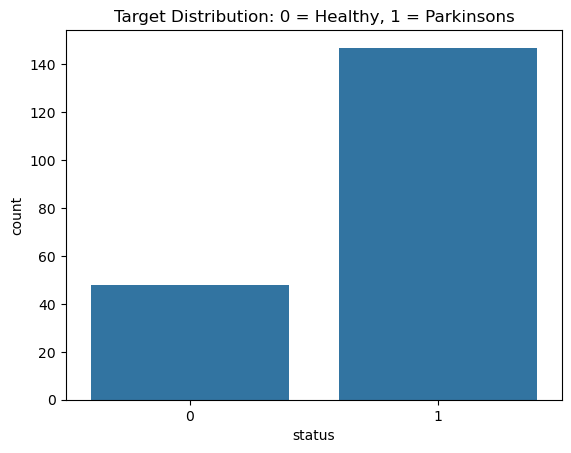

In [8]:
# Target distribution
sns.countplot(x='status', data=data)
plt.title('Target Distribution: 0 = Healthy, 1 = Parkinsons')
plt.show()


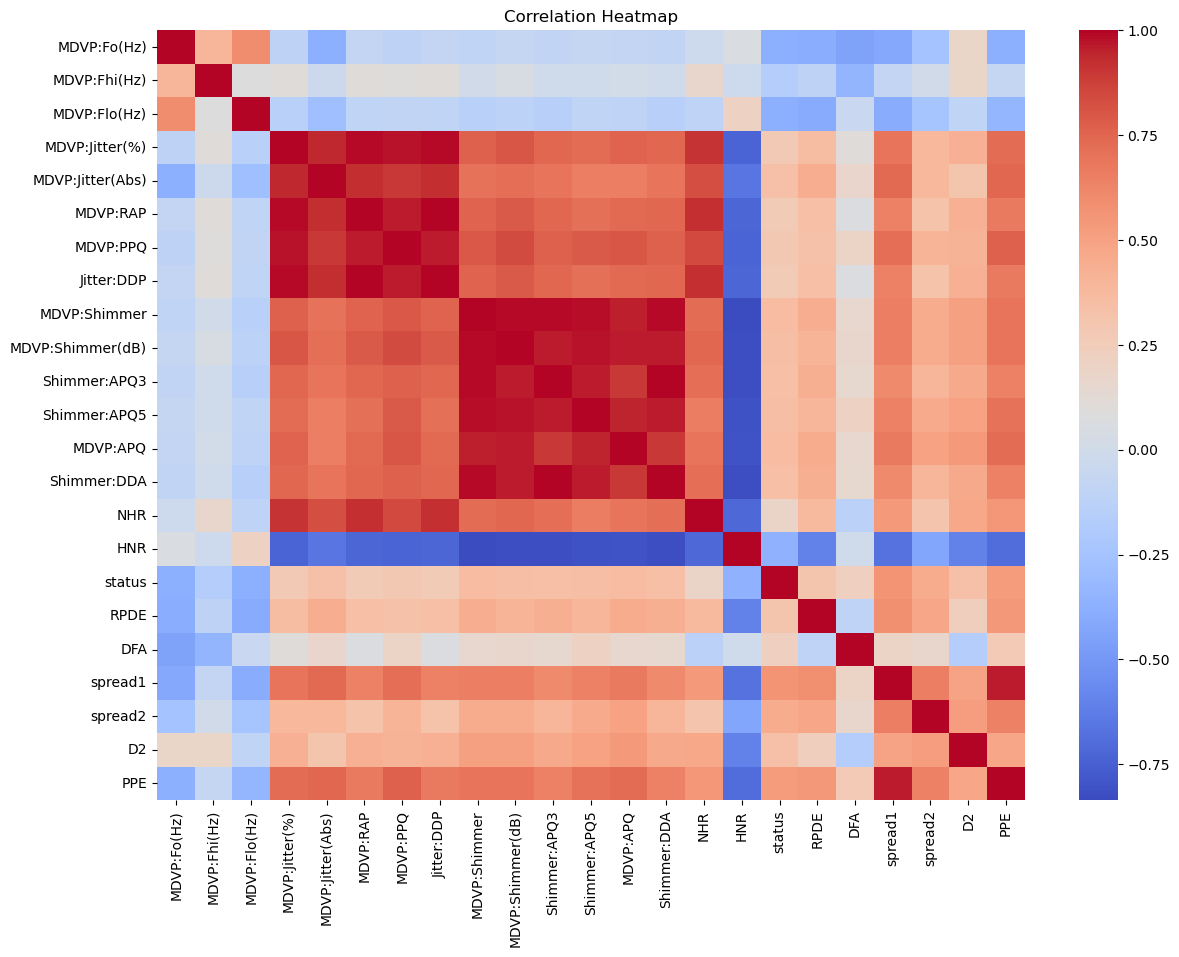

In [9]:
# Correlation matrix
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

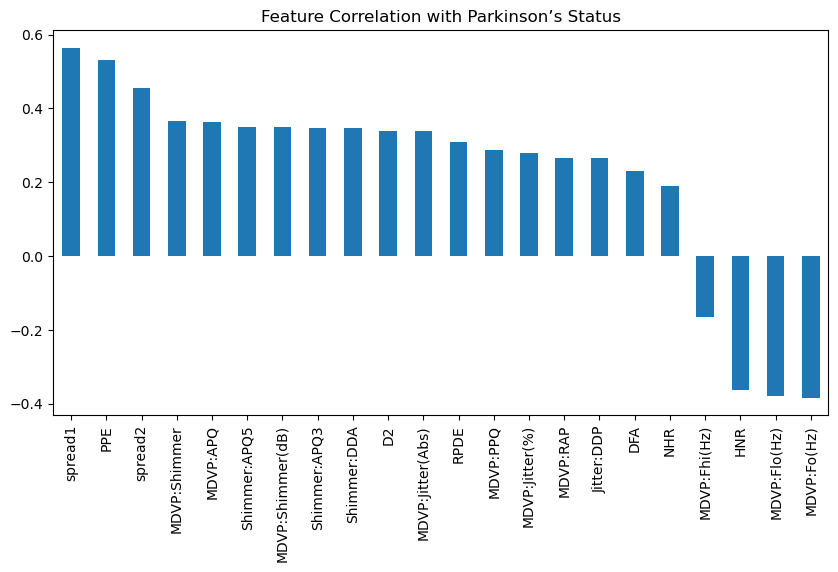

In [24]:
# Top correlated features with target
correlations = data.corr()['status'].drop('status')
correlations.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title('Feature Correlation with Parkinson’s Status')
plt.show()



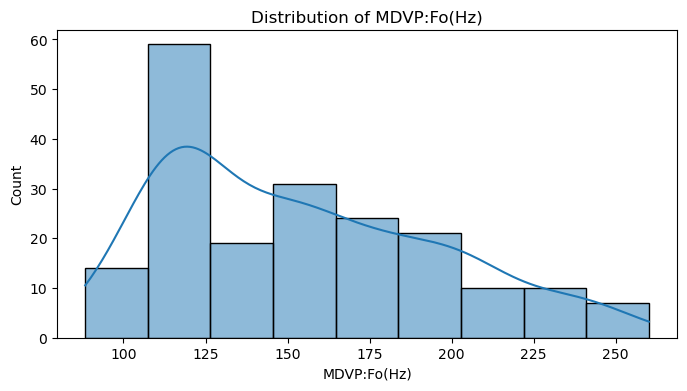

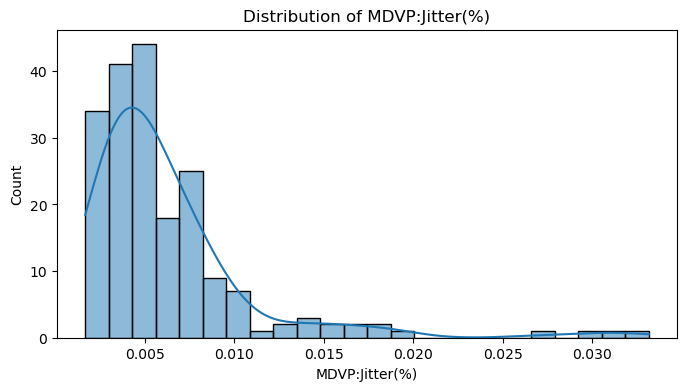

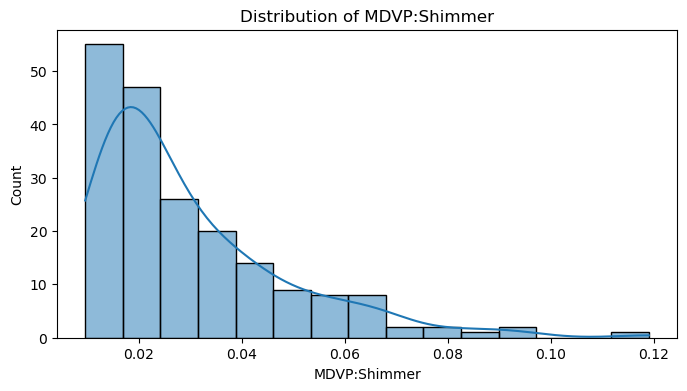

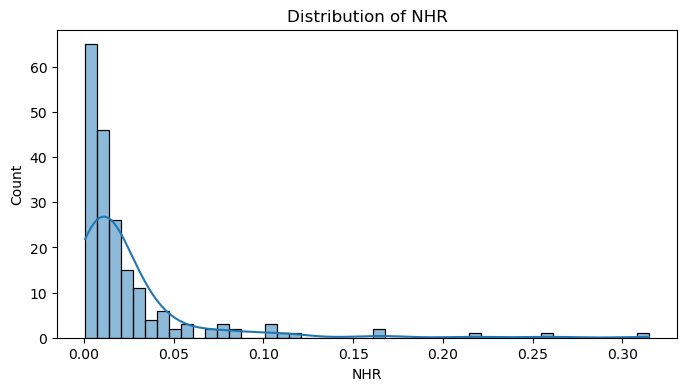

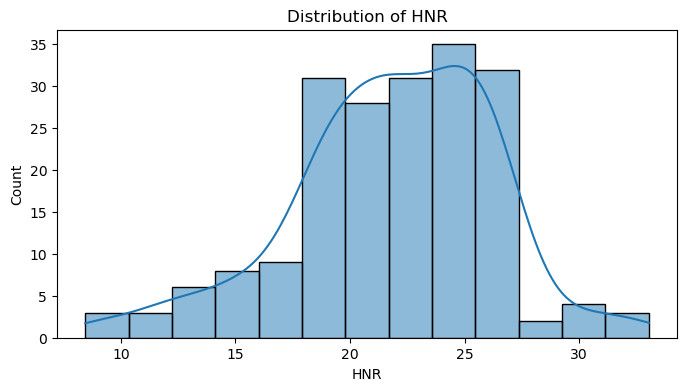

In [25]:
# Distribution of selected key features
selected_features = ['MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer', 'NHR', 'HNR']

for col in selected_features:
    plt.figure(figsize=(8,4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


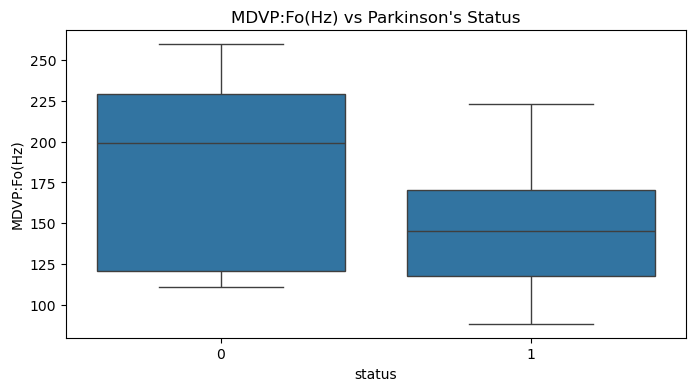

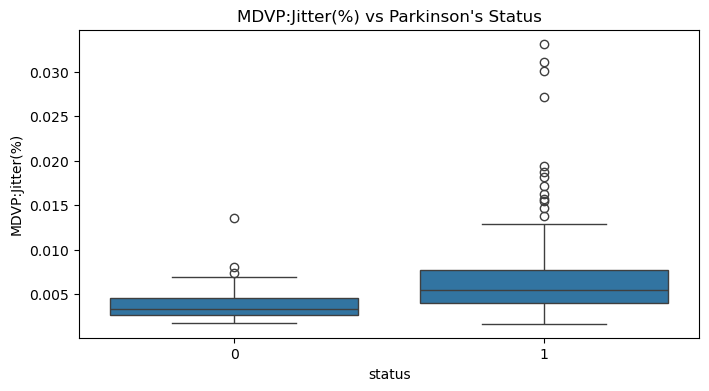

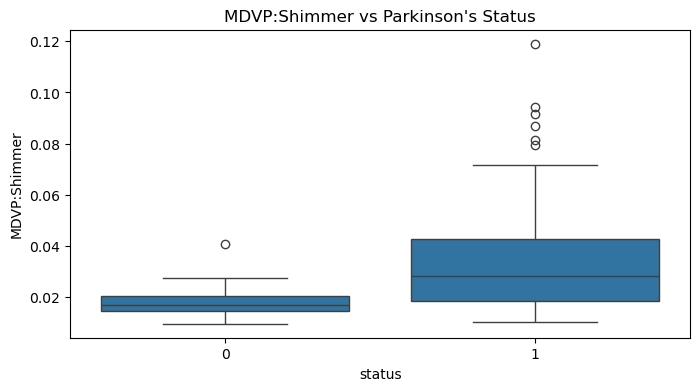

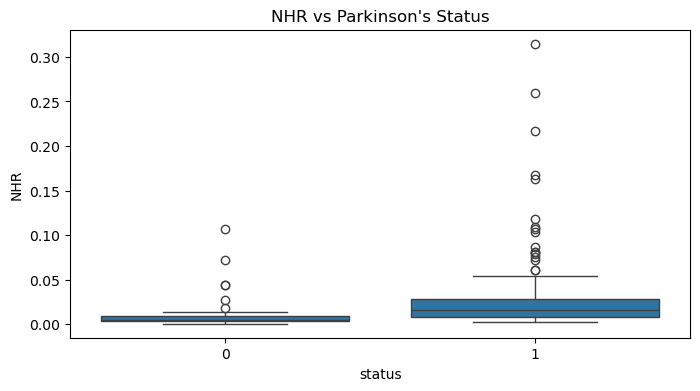

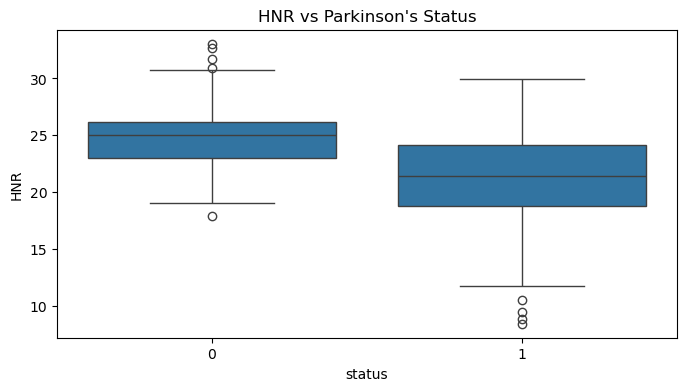

In [29]:
# Boxplots for visual comparison
for col in selected_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='status', y=col, data=data)
    plt.title(f'{col} vs Parkinson\'s Status')

In [10]:
X=data.drop(columns=['status'])
y=data['status']

In [11]:
#split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [12]:
#feature scaling
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
#train random forest classifier
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)
#predict using the model
y_pred_rf=rf_model.predict(X_test)


In [14]:
#evaluate
print("Random Forest Model Accuracy:",accuracy_score(y_test,y_pred_rf))
print("Classification Report:\n",classification_report(y_test,y_pred_rf))
      

Random Forest Model Accuracy: 0.9487179487179487
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



Confusion Matrix:
 [[ 5  2]
 [ 0 32]]


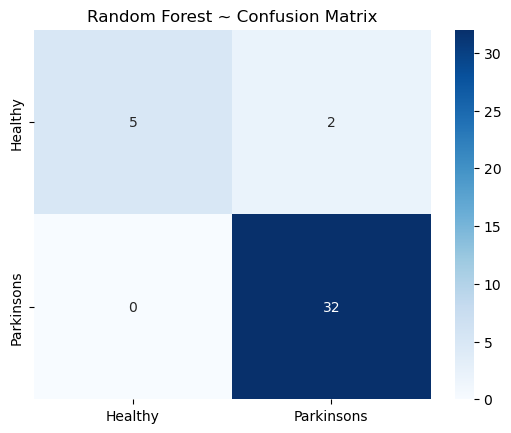

In [15]:
#confusion matrix for random forest
conf_matrix_rf=confusion_matrix(y_test,y_pred_rf)
print("Confusion Matrix:\n",conf_matrix_rf)
sns.heatmap(conf_matrix_rf,annot=True,fmt='d',cmap='Blues',xticklabels=['Healthy','Parkinsons'],
            yticklabels=['Healthy','Parkinsons'])
plt.title('Random Forest ~ Confusion Matrix')
plt.show()

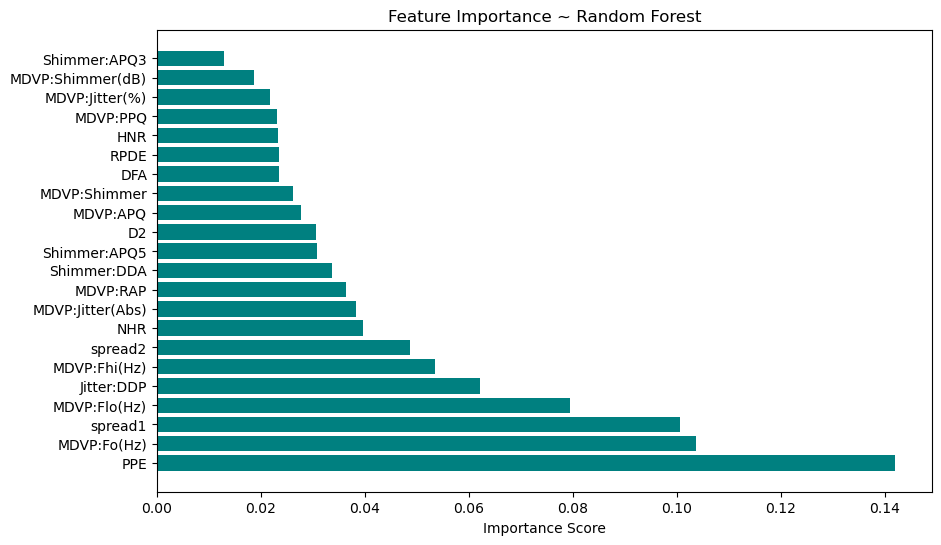

In [16]:
#feature importance
importances=rf_model.feature_importances_
feature_names=X.columns
#create dataframe for sorting
feat_imp_df=pd.DataFrame({'Features':feature_names,'Importances':importances})
feat_imp_df=feat_imp_df.sort_values(by='Importances',ascending=False)
#plot
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Features'],feat_imp_df['Importances'],color='teal')
plt.xlabel("Importance Score")
plt.title("Feature Importance ~ Random Forest")
plt.show()

In [17]:
#train logistic regression
lr_model=LogisticRegression(random_state=42)
lr_model.fit(X_train,y_train)
#predict using trained model
y_pred_lr=lr_model.predict(X_test)



In [18]:
#evaluate
print("Logistic Regression Model Accuracy:",accuracy_score(y_test,y_pred_lr))
print("Classification Report:\n",classification_report(y_test,y_pred_lr))

Logistic Regression Model Accuracy: 0.8974358974358975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



Confusion Matrix:
 [[ 3  4]
 [ 0 32]]


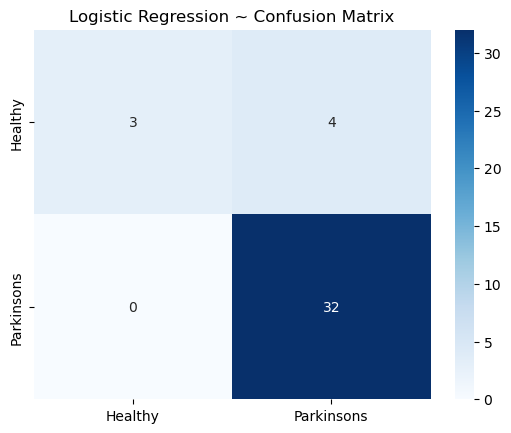

In [19]:
#confusion matrix logistic regression
conf_matrix_lr=confusion_matrix(y_test,y_pred_lr)
print("Confusion Matrix:\n",conf_matrix_lr)
sns.heatmap(conf_matrix_lr,annot=True,fmt='d',cmap='Blues',xticklabels=['Healthy','Parkinsons'],
            yticklabels=['Healthy','Parkinsons'])
plt.title('Logistic Regression ~ Confusion Matrix')
plt.show()

In [20]:
#prediction using new data(random forest)
#take one example from dataset
sample=X.iloc[0].copy()
#modify some values if we want
sample['spread1']=-3.456
sample['PPE']=0.34566
new_data=pd.DataFrame([sample])
print(new_data)

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0    0.0037   0.00554     0.01109       0.04374             0.426  ...   

   MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE       DFA  spread1  \
0   0.02971      0.06545  0.02211  21.033  0.414783  0.815285   -3.456   

    spread2        D2      PPE  
0  0.266482  2.301442  0.34566  

[1 rows x 22 columns]


In [21]:
new_data_scaled=scaler.transform(new_data)
#prediction with random forest
prediction=rf_model.predict(new_data_scaled)
#result
print("Prediction:","Parkinson's" if prediction[0]==1 else "Healthy")

Prediction: Parkinson's


In [22]:
#prediction using new data(logistic regression)
#take one example from dataset
sample=X.iloc[0].copy()
#modify some values if we want
sample['spread1']=-3.456
sample['PPE']=0.34566
new_data=pd.DataFrame([sample])
print(new_data)

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0    0.0037   0.00554     0.01109       0.04374             0.426  ...   

   MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE       DFA  spread1  \
0   0.02971      0.06545  0.02211  21.033  0.414783  0.815285   -3.456   

    spread2        D2      PPE  
0  0.266482  2.301442  0.34566  

[1 rows x 22 columns]


In [23]:
new_data_scaled=scaler.transform(new_data)
#prediction with logistic regression
prediction=lr_model.predict(new_data_scaled)
#result
print("Prediction:","Parkinson's" if prediction[0]==1 else "Healthy")

Prediction: Parkinson's
